In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
data = pd.read_csv('./data/optimization_4.csv')

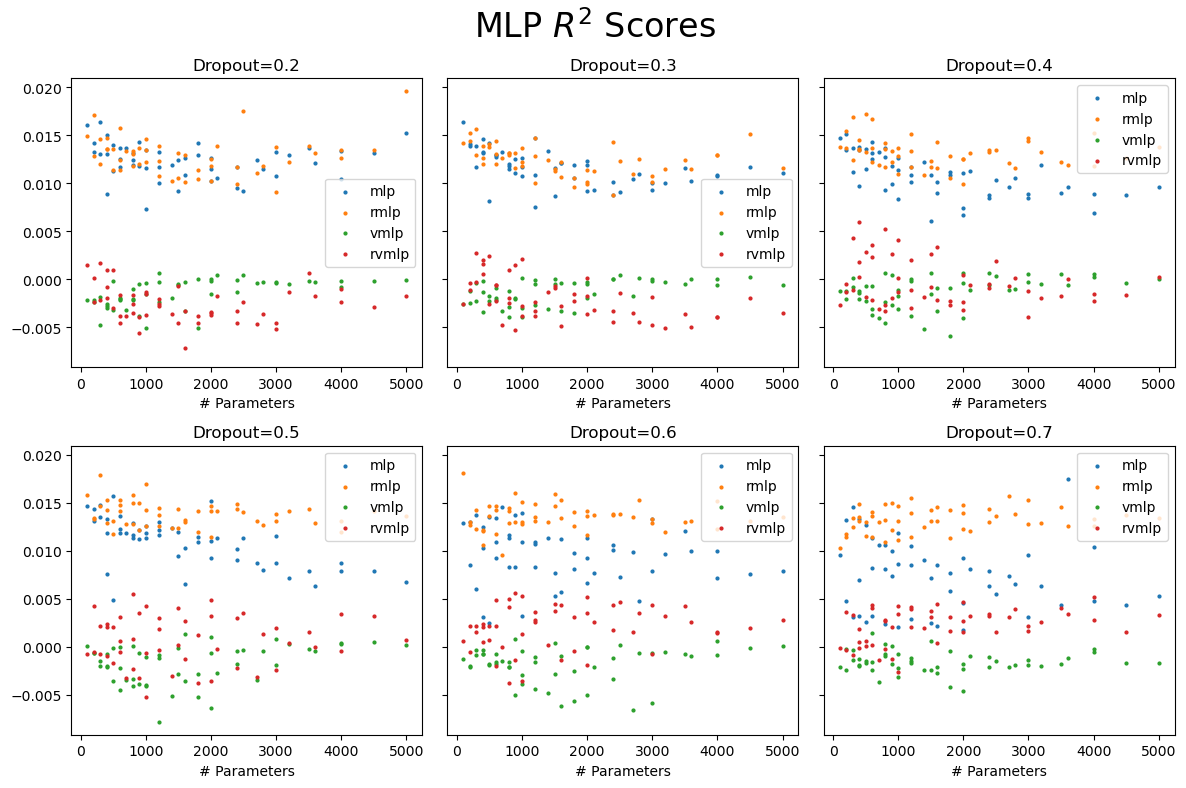

In [5]:
model = 'mlp'

dropouts = np.unique(data['dropout'])

fig, axs = plt.subplots(
    2, len(dropouts)//2, 
    figsize=(2 * len(dropouts), 8), 
    sharey=True
)

for ax, dropout in zip(axs.flatten(), dropouts):
    
    _data = data[data['dropout'] == dropout]

    n_parameters = _data['depth'] * _data['width']

    ax.scatter(n_parameters, _data['mlp'], s=4, label='mlp')
    ax.scatter(n_parameters, _data['rmlp'], s=4, label='rmlp')
    ax.scatter(n_parameters, _data['vmlp'], s=4, label='vmlp')
    ax.scatter(n_parameters, _data['rvmlp'], s=4, label='rvmlp')

    ax.set_title(f'Dropout={dropout}')
    ax.set_xlabel('# Parameters')
    ax.legend()

fig.suptitle(rf'{model.upper()} $R^2$ Scores', fontsize=24)
plt.tight_layout()

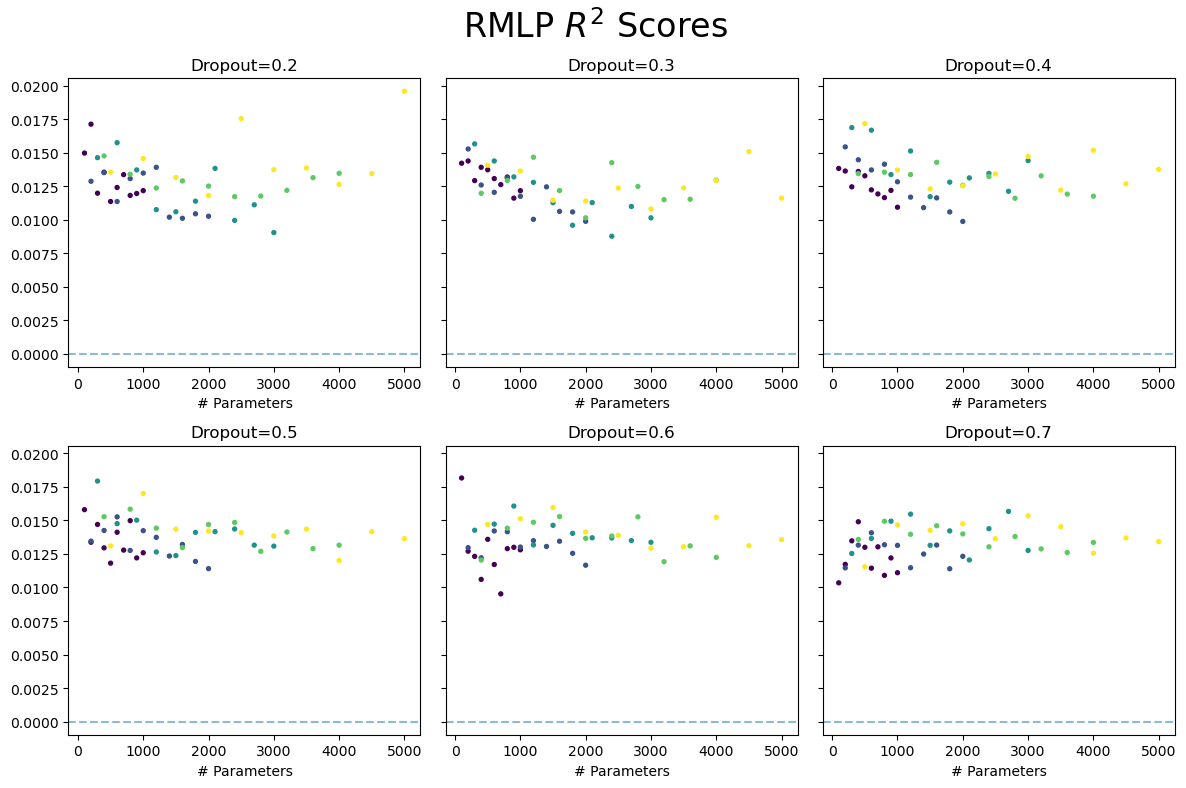

In [7]:
model = 'rmlp'

dropouts = np.unique(data['dropout'])

fig, axs = plt.subplots(
    2, len(dropouts)//2, 
    figsize=(2 * len(dropouts), 8), 
    sharey=True
)

for ax, dropout in zip(axs.flatten(), dropouts):
    
    _data = data[data['dropout'] == dropout]
    ax.scatter(_data['depth'] * _data['width'], _data[model], c=_data['depth'], s=8, label=model)
    ax.axhline(0, linestyle='dashed', alpha=0.5)
    ax.set_title(f'Dropout={dropout}')
    ax.set_xlabel('# Parameters')

fig.suptitle(rf'{model.upper()} $R^2$ Scores', fontsize=24)
plt.tight_layout()

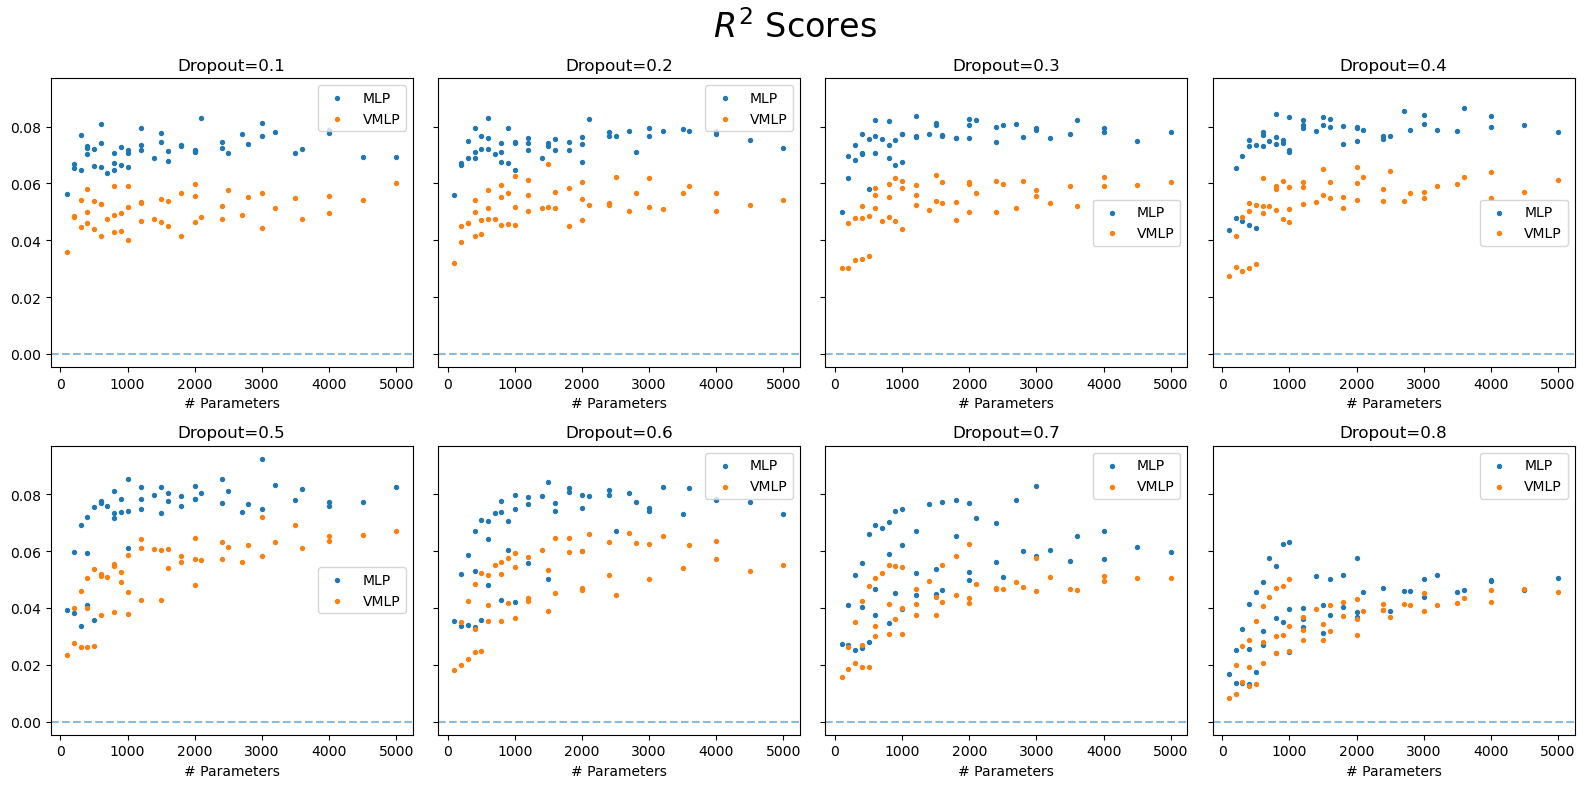

In [4]:
dropouts = np.unique(data['dropout'])

fig, axs = plt.subplots(
    2, len(dropouts)//2, 
    figsize=(2 * len(dropouts), 8), 
    sharey=True
)

for ax, dropout in zip(axs.flatten(), dropouts):
    
    _data = data[data['dropout'] == dropout]
    ax.scatter(_data['depth'] * _data['width'], _data['mlp'], s=8, label='MLP')
    ax.scatter(_data['depth'] * _data['width'], _data['vmlp'], s=8, label='VMLP')
    ax.axhline(0, linestyle='dashed', alpha=0.5)
    ax.set_title(f'Dropout={dropout}')
    ax.set_xlabel('# Parameters')
    ax.legend()

fig.suptitle(r'$R^2$ Scores', fontsize=24)
plt.tight_layout()

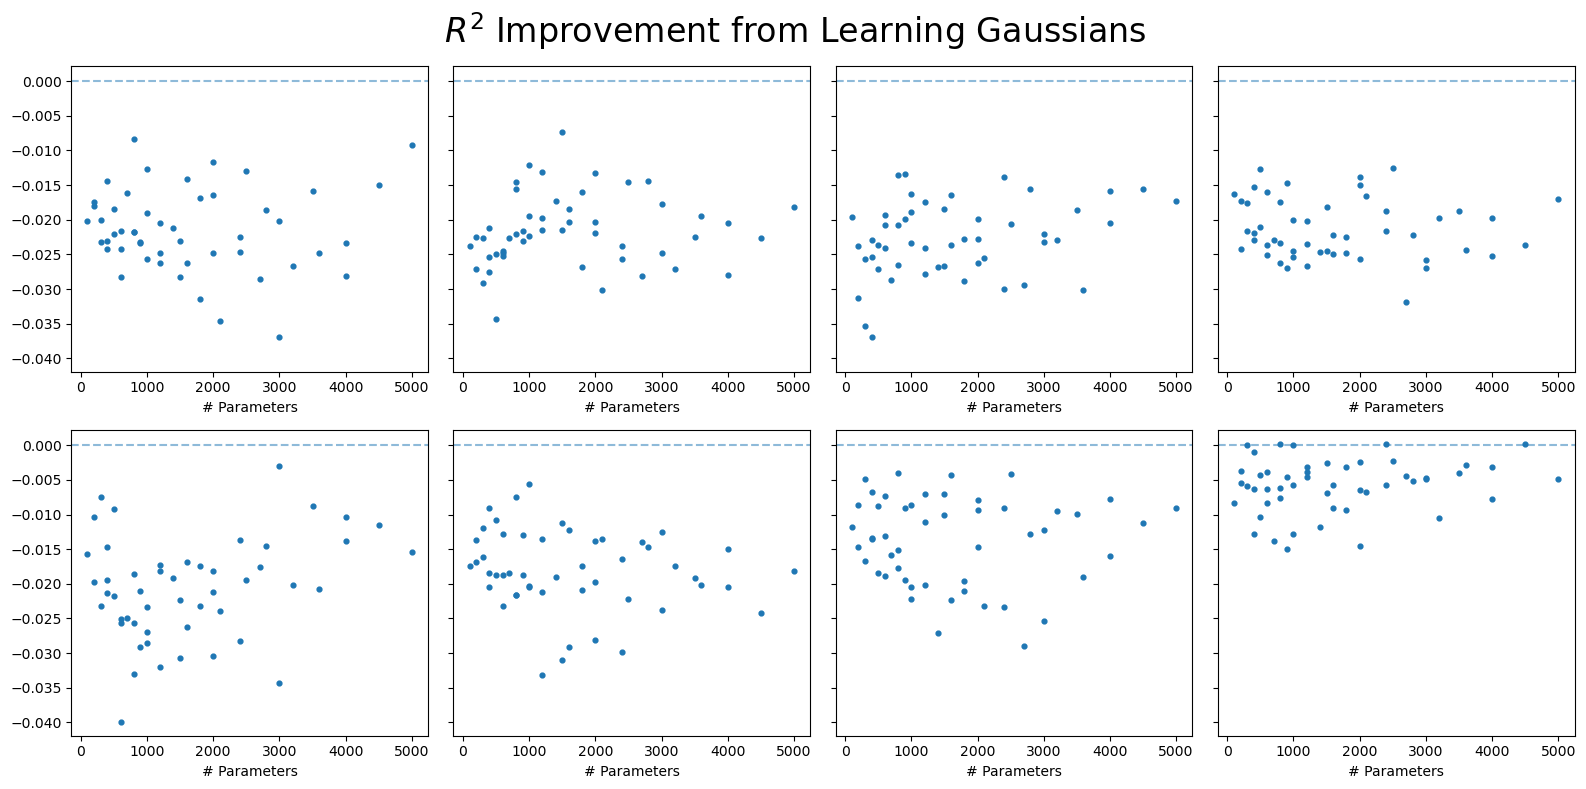

In [5]:
dropouts = np.unique(data['dropout'])

fig, axs = plt.subplots(
    2, len(dropouts) // 2, 
    figsize=(2 * len(dropouts), 8), 
    sharey=True
)

for ax, dropout in zip(axs.flatten(), dropouts):
    
    _data = data[data['dropout'] == dropout]
    ax.scatter(_data['depth'] * _data['width'], _data['difference'], s=12, )
    ax.axhline(0, linestyle='dashed', alpha=0.5)
    ax.set_xlabel('# Parameters')

fig.suptitle(r'$R^2$ Improvement from Learning Gaussians', fontsize=24)
plt.tight_layout()

Text(0.5, 1.0, '$R^2$ Improvement from Learning Gaussians')

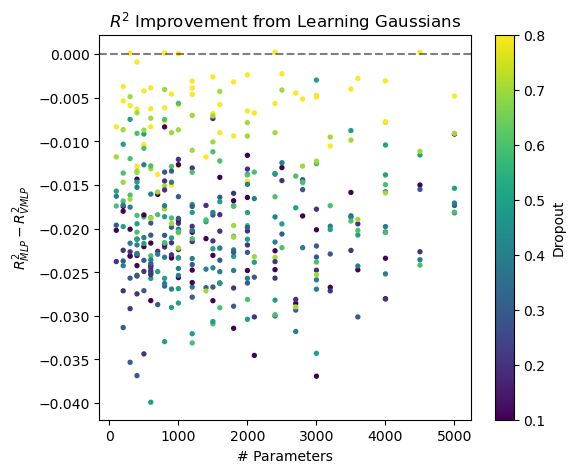

In [6]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.axhline(0, linestyle='dashed', color='black', alpha=0.5)
scatter = ax.scatter(data['depth'] * data['width'], data['difference'], c=data['dropout'], s=8, label='data')
fig.colorbar(scatter, ax=ax, label='Dropout')
ax.set_xlabel('# Parameters')
ax.set_ylabel(r"$R^2_{MLP} - R^2_{VMLP}$")
ax.set_title(r'$R^2$ Improvement from Learning Gaussians')

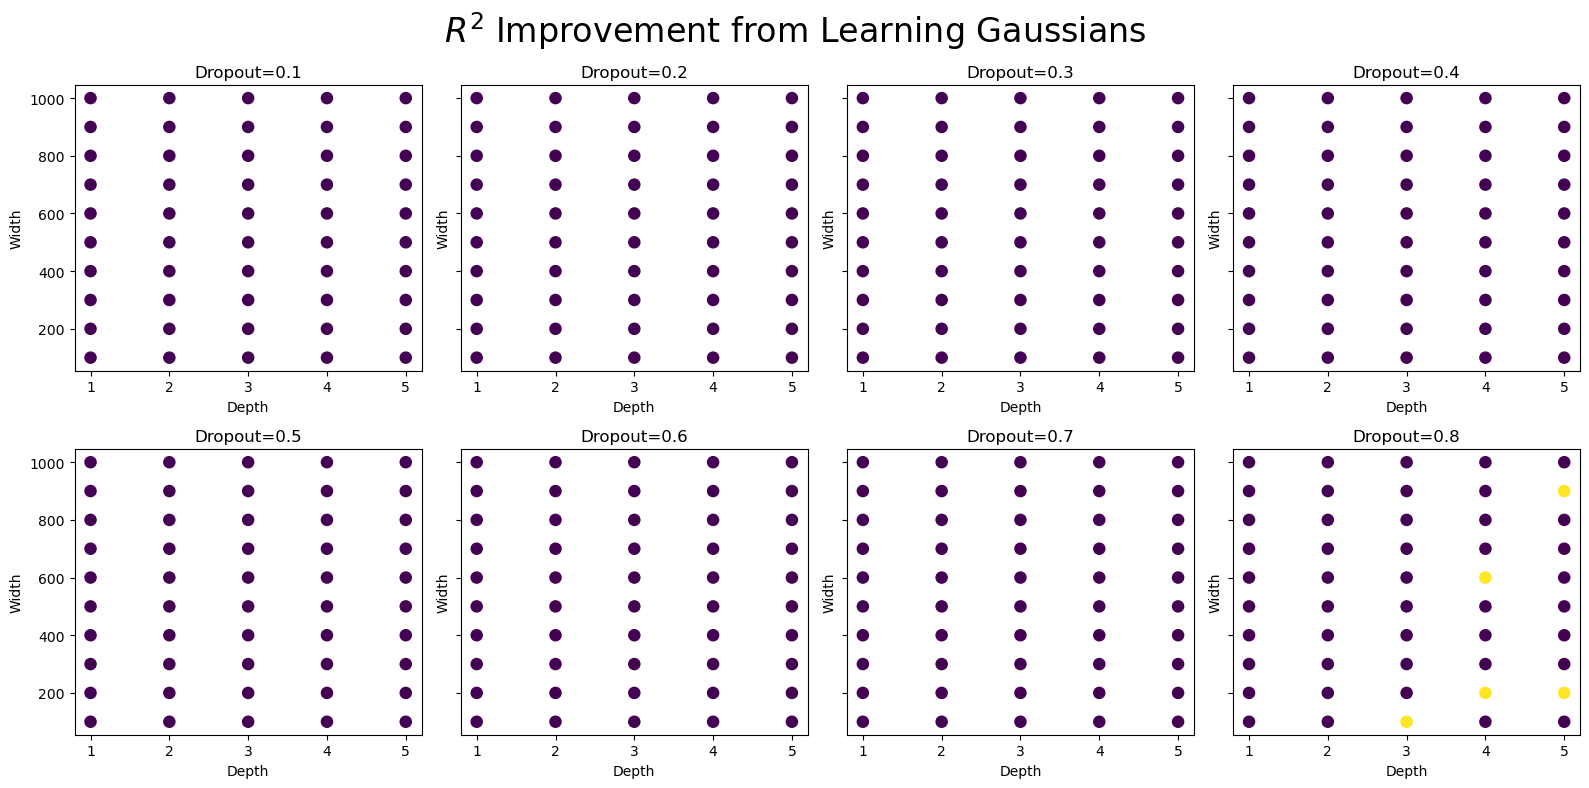

In [7]:
dropouts = np.unique(data['dropout'])

fig, axs = plt.subplots(
    2, len(dropouts) // 2, 
    figsize=(2 * len(dropouts), 8), 
    sharey=True
)

for ax, dropout in zip(axs.flatten(), dropouts):
    
    _data = data[data['dropout'] == dropout]
    
    scatter = ax.scatter(_data['depth'], _data['width'], c=_data['difference'] > 0, s=64, label='data')
    ax.set_xlabel('Depth')
    ax.set_ylabel('Width')
    ax.set_title(f'Dropout={dropout}')
    #fig.colorbar(scatter, ax=ax, label='Improved?')

fig.suptitle(r'$R^2$ Improvement from Learning Gaussians', fontsize=24)
plt.tight_layout()

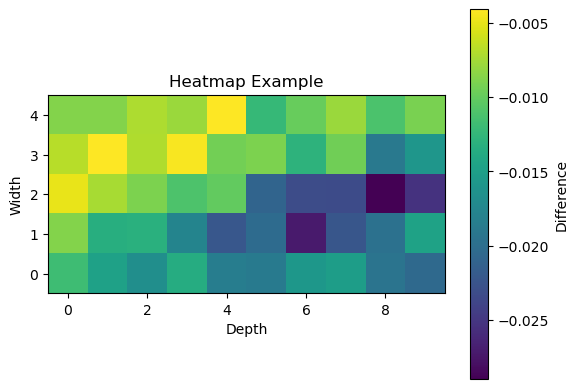

In [9]:
data_f = data[data['dropout'] == 0.7]

depths = np.unique(data_f['depth'])
widths = np.unique(data_f['width'])

depth_grid, width_grid = np.meshgrid(depths, widths, indexing='ij')

# Convert z into a 2D array
difference_grid = np.zeros_like(depth_grid, dtype=float)
for depth, width, *_, difference in data_f.to_numpy():
    depth_idx = np.where(depths == depth)[0][0]
    width_idx = np.where(widths == width)[0][0]
    difference_grid[depth_idx, width_idx] = difference

# Plot the heatmap
fig, ax = plt.subplots()
heatmap = ax.imshow(difference_grid, origin='lower', cmap='viridis')
plt.colorbar(heatmap, ax=ax, label="Difference")
ax.set_xlabel("Depth")
ax.set_ylabel("Width")
ax.set_title("Heatmap Example")
plt.show()